In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import h5py, json
import os,time,sys
import math, random

from importlib import reload

sys.path.append('/content/drive/MyDrive/Colab Notebooks/fidle-master')
import fidle.pwk as pwk

run_dir = './run/SYNOP'


pd.set_option('display.max_rows',200)

In [ ]:
 # ---- Our future enhanced dataset (no need to change)
#
dataset_filename     = 'synop-LYS2.csv'
description_filename = 'synop2.json'
output_dir           = '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
 pwk.override('output_dir')

In [ ]:
data_filename   = '/content/drive/MyDrive/Colab Notebooks/synop-LYS3.csv'
schema_filename = './drive/MyDrive/Colab Notebooks/donnees-synop-essentielles-omm.json'

In [ ]:
#with open(f'{schema_filename}','r') as json_file:
  #  schema = json.load(json_file)

#synop_codes=list( schema['definitions']['donnees-synop-essentielles-omm_records']['properties']['fields']['properties'].keys() )

In [ ]:
df = pd.read_csv(f'{data_filename}', header=0, sep=';')
pwk.subtitle('Raw data :')
display(df.tail(5))

# ---- Get the columns name as descriptions
#

synop_desc = list(df.columns)

# ---- Set Codes as columns name
#
#df.columns   = synop_codes
code2desc    = dict(zip(synop_desc, synop_desc)) #j'ai changé un truc, a voir ce que ca donne

# ---- Count the na values by columns
#
columns_na = df.isna().sum().tolist()

# ---- Show all of that
#
df_desc=pd.DataFrame({'Description':synop_desc, 'Na':columns_na}) #same

pwk.subtitle('List of columns :')
display(df_desc.style.set_properties(**{'text-align': 'left'}))

print('Shape is : ', df.shape)

<br>**Raw data :**

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
35346,7149,2022-02-12T07:00:00+01:00,103020.0,-180.0,"En baisse, puis stationnaire, ou en baisse, pu...",80.0,1.3,272.45,271.15,91.0,...,89,Athis-Mons,91027,Métropole du Grand Paris,200054781.0,Essonne,91,Île-de-France,11.0,2
35347,7149,2022-02-12T10:00:00+01:00,102970.0,-40.0,"En baisse, puis stationnaire, ou en baisse, pu...",150.0,2.3,275.05,272.65,84.0,...,89,Athis-Mons,91027,Métropole du Grand Paris,200054781.0,Essonne,91,Île-de-France,11.0,2
35348,7149,2022-02-12T13:00:00+01:00,102710.0,-240.0,"Stationnaire ou en hausse, puis en baisse, ou ...",140.0,3.2,280.65,270.65,49.0,...,89,Athis-Mons,91027,Métropole du Grand Paris,200054781.0,Essonne,91,Île-de-France,11.0,2
35349,7149,2022-02-12T16:00:00+01:00,102400.0,-300.0,"En baisse, puis stationnaire, ou en baisse, pu...",170.0,2.6,282.15,270.25,43.0,...,89,Athis-Mons,91027,Métropole du Grand Paris,200054781.0,Essonne,91,Île-de-France,11.0,2
35350,7149,2022-02-12T19:00:00+01:00,102300.0,-110.0,"En baisse, puis stationnaire, ou en baisse, pu...",160.0,2.5,278.65,270.35,55.0,...,89,Athis-Mons,91027,Métropole du Grand Paris,200054781.0,Essonne,91,Île-de-France,11.0,2


<br>**List of columns :**

,Description,Na
0,ID OMM station,0
1,Date,0
2,Pression au niveau mer,0
3,Variation de pression en 3 heures,0
4,Type de tendance barométrique,1
5,Direction du vent moyen 10 mn,0
6,Vitesse du vent moyen 10 mn,0
7,Température,0
8,Point de rosée,0
9,Humidité,0


Shape is :  (35351, 82)


In [ ]:
corrmatrix = df.corr()
corrmatrix


In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/feature_engineering.py
import feature_engineering
features_corr = \
        feature_engineering.get_features_correlated_to_target(
                df, target_feature='Précipitations dans la dernière heure')

features_corr

In [ ]:
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
import visualization

--2022-06-07 21:09:32--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13008 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.70K  --.-KB/s    in 0s      

2022-06-07 21:09:32 (111 MB/s) - ‘visualization.py’ saved [13008/13008]



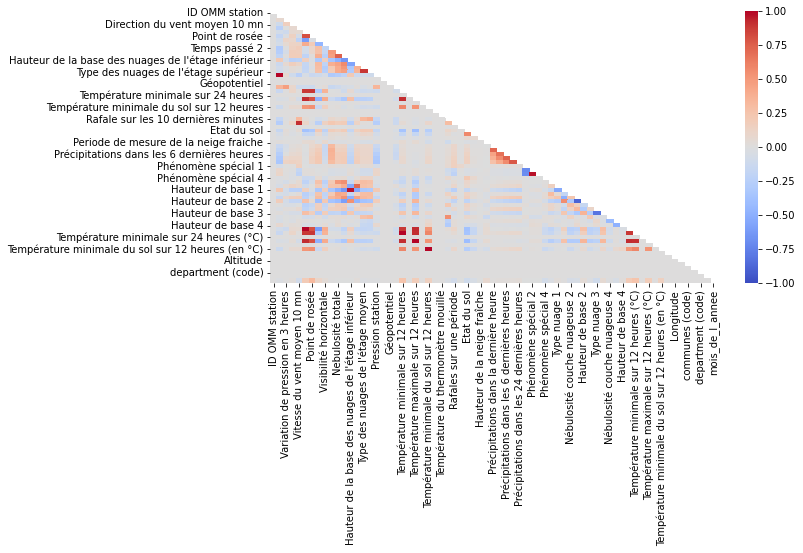

In [ ]:
visualization.plot_corr(df, width=10, height=5, 
                        print_value=False)

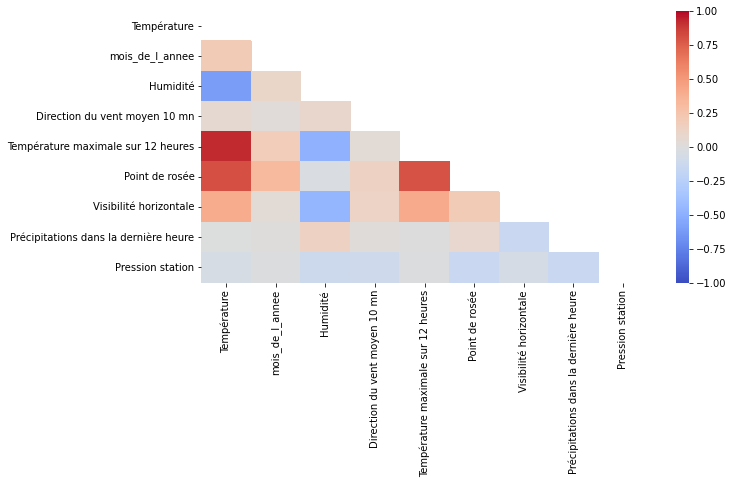

In [ ]:
columns_used=['Température','Date','department (name)','mois_de_l_annee','Humidité','Direction du vent moyen 10 mn','Température maximale sur 12 heures','Point de rosée','Visibilité horizontale','Précipitations dans la dernière heure','Pression station']
visualization.plot_corr(df[columns_used], width=10, height=5, 
                        print_value=False)

In [ ]:
columns_used=['Date','Température','department (name)','mois_de_l_annee','Humidité']

# ---- Drop unused columns

to_drop = df.columns.difference(columns_used)
df.drop( to_drop, axis=1, inplace=True)

df=df.loc[(df["department (name)"]=="Essonne")] ##on laisse que essonne

# ---- Show all of that

pwk.subtitle('Our selected columns :')
display(df.tail(341351))

<br>**Our selected columns :**

,Date,Température,Humidité,department (name),mois_de_l_annee
0,2010-01-01T01:00:00+01:00,273.95,94.0,Essonne,1
1,2010-01-01T04:00:00+01:00,273.75,89.0,Essonne,1
2,2010-01-01T07:00:00+01:00,273.25,87.0,Essonne,1
3,2010-01-01T10:00:00+01:00,273.25,84.0,Essonne,1
4,2010-01-01T13:00:00+01:00,273.85,78.0,Essonne,1
...,...,...,...,...,...
35346,2022-02-12T07:00:00+01:00,272.45,91.0,Essonne,2
35347,2022-02-12T10:00:00+01:00,275.05,84.0,Essonne,2
35348,2022-02-12T13:00:00+01:00,280.65,49.0,Essonne,2
35349,2022-02-12T16:00:00+01:00,282.15,43.0,Essonne,2


In [ ]:
pwk.subtitle('Few statistics :')
display(df.describe().style.format('{:.2f}'))

# ---- 'per' column is constant, we can drop it



# ---- Count the na values by columns
#
dataset_na    = df.isna().sum().tolist()
dataset_cols  = df.columns.tolist()
dataset_desc  = [ code2desc[c] for c in dataset_cols ]

# ---- Show all of that
#
pwk.subtitle('Do we have na values ?')
df_desc=pd.DataFrame({'Columns':dataset_cols, 'Description':dataset_desc, 'Na':dataset_na})
display(df_desc.style.set_properties(**{'text-align': 'left'}))


<br>**Few statistics :**

,Température,mois_de_l_annee
count,35351.00,35351.00
mean,285.30,6.47
std,7.26,3.47
min,260.75,1.00
25%,280.05,3.00
50%,284.95,6.00
75%,290.35,9.00
max,314.55,12.00


<br>**Do we have na values ?**

,Columns,Description,Na
0,Date,Date,0
1,Température,Température,0
2,department (name),department (name),0
3,mois_de_l_annee,mois_de_l_annee,0


In [ ]:
import csv
with open('./drive/MyDrive/Colab Notebooks/donnees-synop-essentielles-omm (1).csv') as f:
    reader = csv.DictReader(f)
    print (reader.fieldnames)

["ID OMM station;Date;Pression au niveau mer;Variation de pression en 3 heures;Type de tendance barométrique;Direction du vent moyen 10 mn;Vitesse du vent moyen 10 mn;Température;Point de rosée;Humidité;Visibilité horizontale;Temps présent;Temps passé 1;Temps passé 2;Nebulosité totale;Nébulosité  des nuages de l' étage inférieur;Hauteur de la base des nuages de l'étage inférieur;Type des nuages de l'étage inférieur;Type des nuages de l'étage moyen;Type des nuages de l'étage supérieur;Pression station;Niveau barométrique;Géopotentiel;Variation de pression en 24 heures;Température minimale sur 12 heures;Température minimale sur 24 heures;Température maximale sur 12 heures;Température maximale sur 24 heures;Température minimale du sol sur 12 heures;Méthode de mesure Température du thermomètre mouillé;Température du thermomètre mouillé;Rafale sur les 10 dernières minutes;Rafales sur une période;Periode de mesure de la rafale;Etat du sol;Hauteur totale de la couche de neige", ' glace', ' au

In [ ]:
# ---- First of all, we have to sort on the date

df.sort_values(by='Date',  inplace=True)
df.reset_index(drop=True, inplace=True)

# ---- Before : Lines with NaN

na_rows=df.isna().any(axis=1)
pwk.subtitle('Before :')
display( df[na_rows].head(50) )

# ---- Nice interpolation for plugging holes

df.interpolate(inplace=True)

# ---- After

pwk.subtitle('After :')
display(df[na_rows].head(50))

In [ ]:
pwk.subtitle('Few statistics :')
display(df.describe().style.format('{:.2f}'))

# ---- 'per' column is constant, we can drop it



# ---- Count the na values by columns
#
dataset_na    = df.isna().sum().tolist()
dataset_cols  = df.columns.tolist()
dataset_desc  = [ code2desc[c] for c in dataset_cols ]

# ---- Show all of that
#
pwk.subtitle('Do we have na values ?')
df_desc=pd.DataFrame({'Columns':dataset_cols, 'Description':dataset_desc, 'Na':dataset_na})
display(df_desc.style.set_properties(**{'text-align': 'left'}))

In [ ]:
 # ---- Count the na values by columns
#
dataset_na    = df.isna().sum().tolist()
dataset_cols  = df.columns.tolist()
dataset_desc  = [ code2desc[c] for c in dataset_cols ]

# ---- Show all of that
#
df_desc=pd.DataFrame({'Columns':dataset_cols, 'Description':dataset_desc, 'Na':dataset_na})
pwk.subtitle('Dataset columns :')
display(df_desc.style.set_properties(**{'text-align': 'left'}))

pwk.subtitle('Have a look :')
display(df.tail(240))
print('Shape is : ', df.shape)

35351


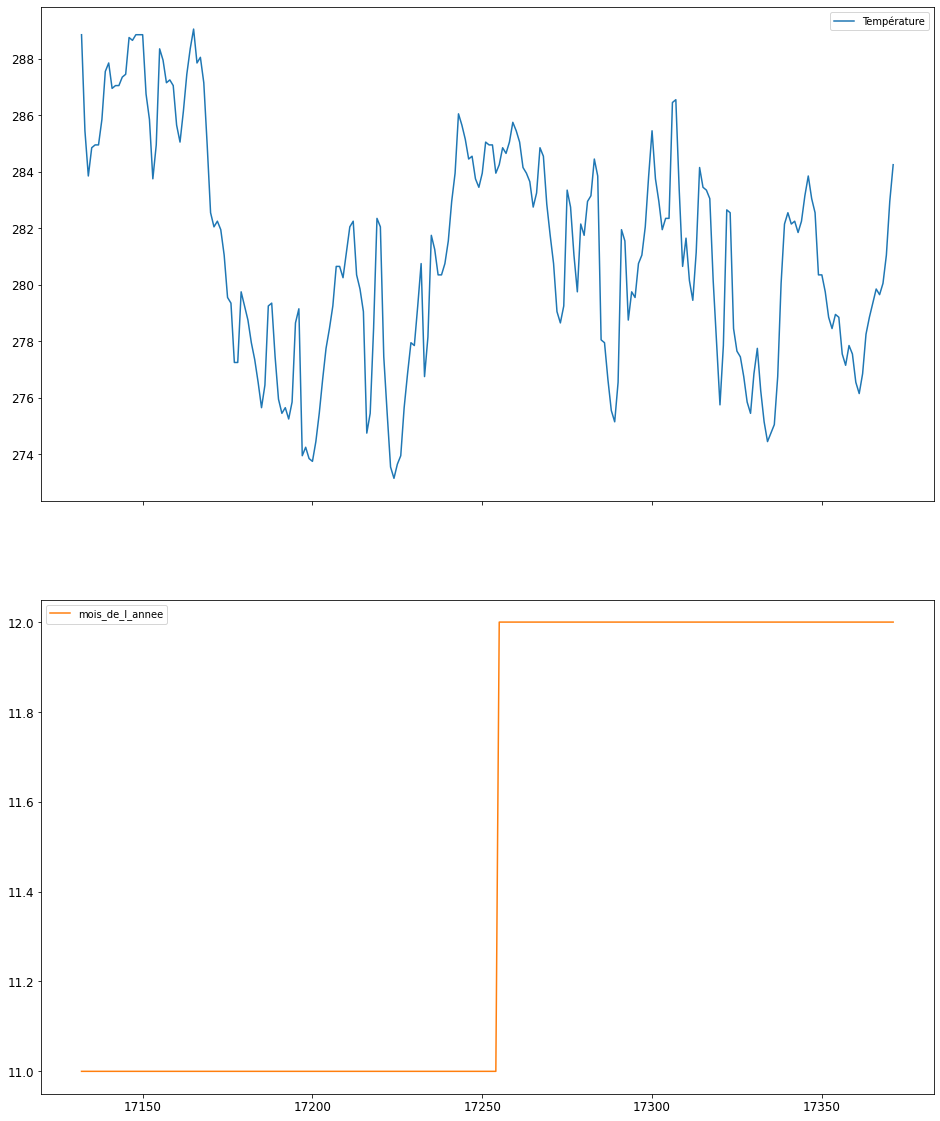

In [ ]:
print(len(df))
i=random.randint(0,len(df)-240) #pour avoir un mois au hasard
#i=0 #pour avoir les premieres valeurs
df.iloc[i:i+240].plot(subplots=True, fontsize=12, figsize=(16,20)) #le +240 fait que ca fait un mois puisqu'il y a 240 mesures/mois
pwk.save_fig('01-one-month')
plt.show()

In [ ]:
 # ---- Save it
#
pwk.mkdir(output_dir)

filedata = f'{output_dir}/{dataset_filename}'
filedesc = f'{output_dir}/{description_filename}'

df.to_csv(filedata, sep=';', index=False)
size=os.path.getsize(filedata)/(1024*1024)
print(f'Dataset saved. ({size:0.1f} Mo)')

with open(filedesc, 'w', encoding='utf-8') as f:
    json.dump(code2desc, f, indent=4)
print('Synop description saved.')
    

Dataset saved. (1.8 Mo)
Synop description saved.
